In [1]:
!pip install feature-engine 
!pip install imbalanced-learn

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# set random seed for reproducibility
np.random.seed(42)

In [3]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


# duplicates

In [5]:
df.duplicated().sum()

1

In [6]:
print(f'with duplicates:{df.shape}')
df.drop_duplicates(inplace=True)
print(f'without duplicates:{df.shape}')

with duplicates:(13393, 12)
without duplicates:(13392, 12)


# class and gender pie 

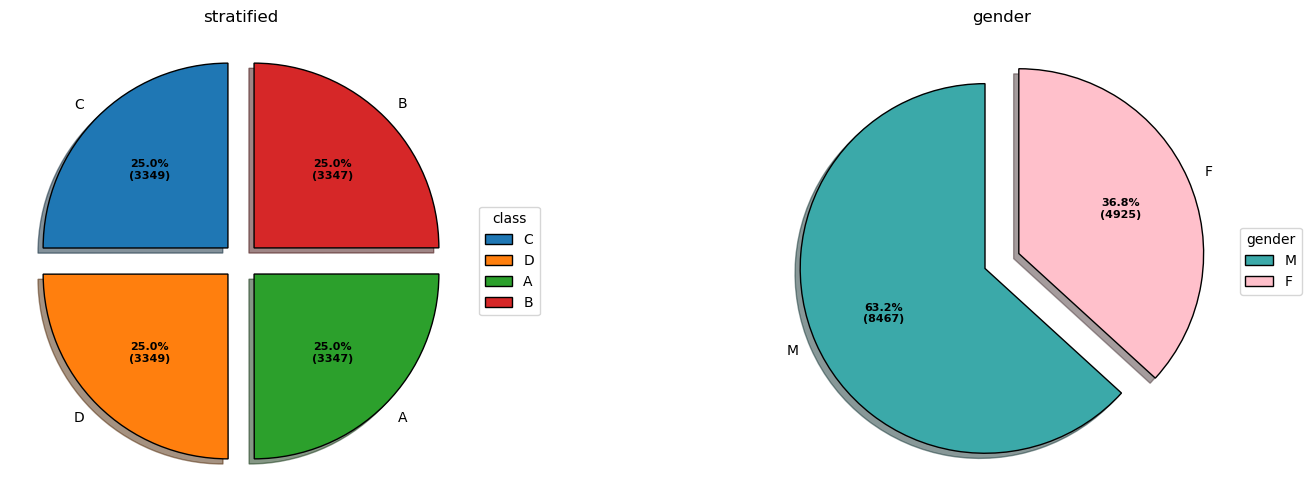

In [9]:
# Creating autocpt arguments
def pie(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

fig, axs = plt.subplots(1,2,figsize =(18, 6))

# class
wedges1, texts1, autotexts1 = axs[0].pie(df['class'].value_counts(),
                                      autopct = lambda pct: pie(pct, df['class'].value_counts()),
                                      explode = (.1, .1, .1, 0.1),
                                      labels = df['class'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)
 
# Adding legend
axs[0].legend(wedges1, df['class'].value_counts().index, title='class',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[0].set_title("stratified")

# gender
wedges1, texts1, autotexts1 = axs[1].pie(df['gender'].value_counts(),
                                      autopct = lambda pct: pie(pct, df['gender'].value_counts()),
                                      explode = (0.1, .1), colors = ("#3BA9A9", "pink"),
                                      labels = df['gender'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)
 
# Adding legend
axs[1].legend(wedges1, df['gender'].value_counts().index, title='gender',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[1].set_title("gender")

plt.show()

# outliers

<AxesSubplot:>

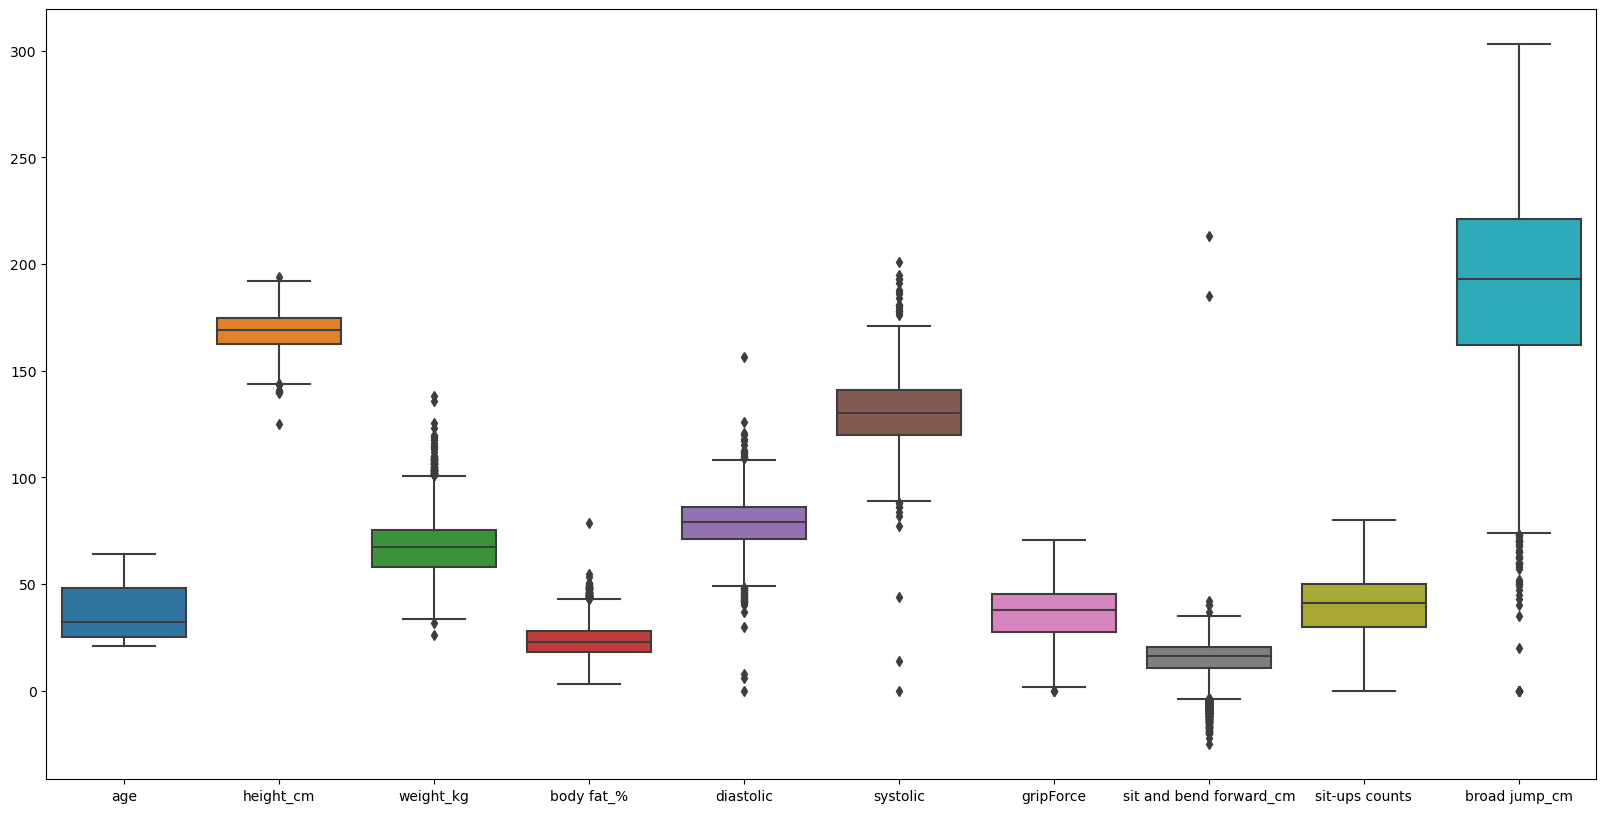

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [9]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.239608,78.797499,130.238120,36.964569,15.208933,39.770385,190.131355
std,13.625886,8.426305,11.949061,7.256829,10.742165,14.709536,10.624959,8.456904,14.276902,39.868988
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [10]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


# #body fat

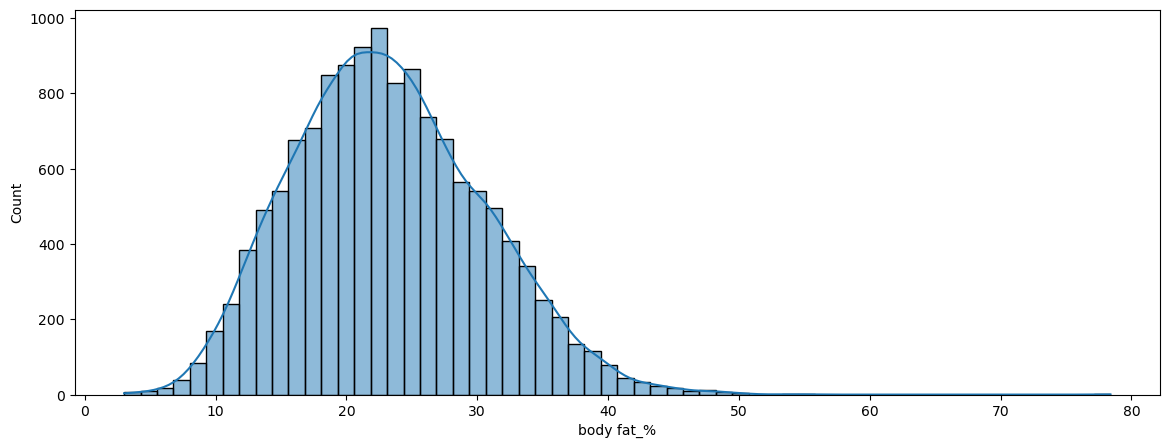

In [7]:
plt.figure(figsize=(14,5))
sns.histplot(data=df, x="body fat_%", bins=60, kde=True)
plt.show()

In [8]:
filtered_data = df[df['body fat_%'] > 53]
filtered_data


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
735,21.0,M,177.6,74.5,78.4,69.0,122.0,44.9,26.1,59.0,235.0,A
1400,30.0,F,162.5,113.3,53.5,82.0,135.0,24.4,3.0,12.0,100.0,D
11529,25.0,M,172.8,95.0,54.9,90.0,131.0,37.5,5.6,28.0,203.0,D


<AxesSubplot:xlabel='body fat_%'>

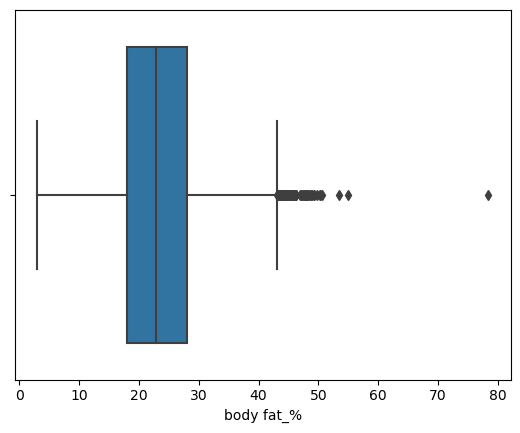

In [9]:
sns.boxplot(data=df,x="body fat_%")

# sit and bend forward_cm

In [10]:
filtered_data2 = df[df['sit and bend forward_cm'] >=50]
filtered_data2


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
2657,33.0,M,165.6,60.4,17.8,81.0,127.0,38.6,213.0,53.0,244.0,B
3355,45.0,M,164.4,64.4,24.3,96.0,142.0,38.5,185.0,44.0,223.0,A


<AxesSubplot:xlabel='sit and bend forward_cm'>

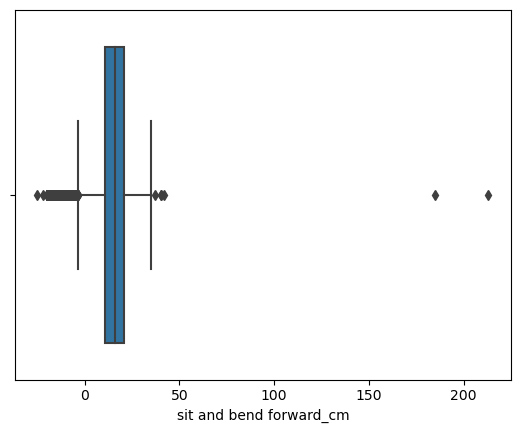

In [11]:
sns.boxplot(data=df,x="sit and bend forward_cm")

# broad jump_cm

In [12]:
filtered_data3 = df[df['broad jump_cm'] <=35]
filtered_data3


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
484,22.0,F,167.4,66.2,34.0,62.0,110.0,28.5,11.2,38.0,0.0,C
712,58.0,M,168.7,76.1,27.5,84.0,139.0,34.5,2.0,0.0,0.0,D
1919,59.0,F,162.9,61.0,32.6,82.0,123.0,29.7,19.5,0.0,0.0,D
2496,63.0,F,153.7,53.3,30.3,69.0,120.0,17.8,16.3,1.0,35.0,D
3007,28.0,F,143.8,72.6,48.7,85.0,136.0,12.6,0.1,4.0,20.0,D
4756,28.0,M,176.6,82.2,20.7,83.0,126.0,40.9,17.6,46.0,0.0,C
4900,60.0,F,162.2,67.3,41.8,47.0,131.0,22.1,19.5,0.0,0.0,D
7366,50.0,M,178.2,88.4,23.4,85.0,146.0,54.9,19.3,51.0,0.0,C
7721,56.0,F,156.0,51.1,28.4,73.0,113.0,20.7,23.0,23.0,0.0,C
7944,45.0,F,153.4,33.7,16.1,81.0,124.0,6.7,11.5,8.0,0.0,D


<AxesSubplot:xlabel='broad jump_cm'>

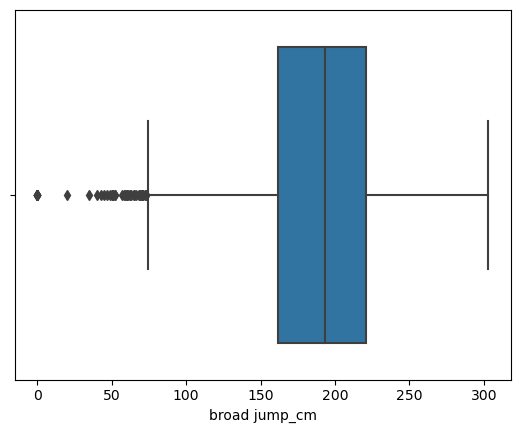

In [13]:
sns.boxplot(data=df,x="broad jump_cm")

# preprocessing

In [14]:
df.rename(columns={"height_cm": "height", "weight_kg": "weight","body fat_%":"body_fat",
                   "sit and bend forward_cm":"sit_and_bend_forward","sit-ups counts":"sit-ups",
                   "broad jump_cm":"broad_jump","class":"performance"},inplace=True)

In [15]:
df.head()

,age,gender,height,weight,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [16]:
df.age = df.age.astype(int)

gender = {'F':0,'M':1}
df['gender'] =df['gender'].replace(gender)

df["BMI_val"]=round((df['weight']/(df['height'])/(df['height']))*10000,2)

def BMI (row):
    bmi = ((row.weight/row.height)/row.height)*10000
    if bmi>=18.5 and bmi < 25: 
        return 0 
    elif bmi < 18.5:
        return 1
    elif bmi >= 25 and bmi < 30:
        return 2
    else:
        return 3
    
df['BMI'] = df.apply(BMI,axis=1)
df.head()

,age,gender,height,weight,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI
0,27,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.34,2
1,25,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.50,0
2,31,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.18,0
3,32,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.35,0
4,28,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.41,0


In [21]:
filtered_data3 = df[df['broad_jump'] <36]
filtered_data3

,age,gender,height,weight,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI
484,22,0,167.4,66.2,34.0,62.0,110.0,28.5,11.2,38.0,0.0,C,23.62,0
712,58,1,168.7,76.1,27.5,84.0,139.0,34.5,2.0,0.0,0.0,D,26.74,2
1919,59,0,162.9,61.0,32.6,82.0,123.0,29.7,19.5,0.0,0.0,D,22.99,0
2496,63,0,153.7,53.3,30.3,69.0,120.0,17.8,16.3,1.0,35.0,D,22.56,0
3007,28,0,143.8,72.6,48.7,85.0,136.0,12.6,0.1,4.0,20.0,D,35.11,3
4756,28,1,176.6,82.2,20.7,83.0,126.0,40.9,17.6,46.0,0.0,C,26.36,2
4900,60,0,162.2,67.3,41.8,47.0,131.0,22.1,19.5,0.0,0.0,D,25.58,2
7366,50,1,178.2,88.4,23.4,85.0,146.0,54.9,19.3,51.0,0.0,C,27.84,2
7721,56,0,156.0,51.1,28.4,73.0,113.0,20.7,23.0,23.0,0.0,C,21.00,0
7944,45,0,153.4,33.7,16.1,81.0,124.0,6.7,11.5,8.0,0.0,D,14.32,1


<AxesSubplot:>

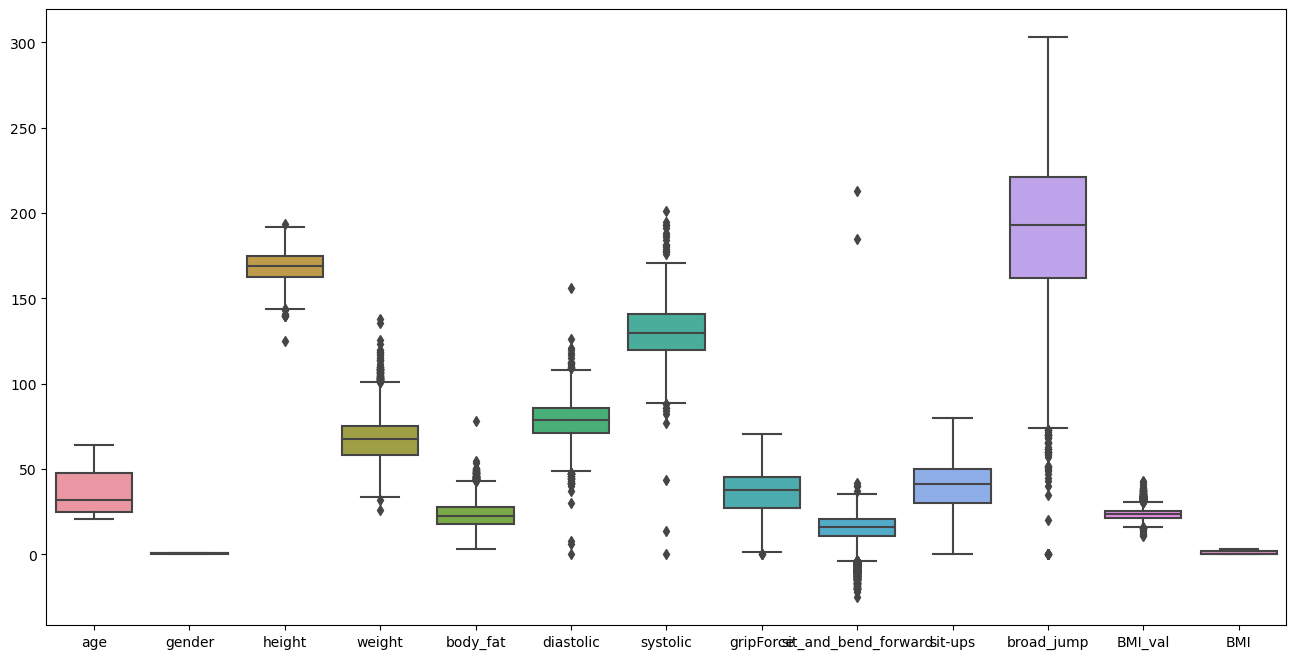

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)

In [17]:
Class = {'A':0, 'B':1, 'C':2, 'D':3}
df['class'] =df['performance'].replace(Class)
df.head()

,age,gender,height,weight,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class
0,27,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.34,2,2
1,25,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.50,0,0
2,31,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.18,0,2
3,32,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.35,0,1
4,28,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.41,0,1


In [18]:
df = df[(df["body_fat"] <= 70)]
df = df[(df["sit_and_bend_forward"] <= 50)]
df = df[(df["broad_jump"] >0)]


df.drop(['height','weight'],axis=1, inplace=True)
df.describe()

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,BMI,class
count,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000,13379.000000
mean,36.766873,0.632409,23.230296,78.799170,130.237903,36.971030,15.181839,39.784962,190.263630,23.605638,0.620001,1.499738
std,13.621948,0.482167,7.237030,10.740998,14.711734,10.620449,8.150634,14.257824,39.542297,2.939870,0.952453,1.117975
min,21.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,20.000000,11.100000,0.000000,0.000000
25%,25.000000,0.000000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,21.610000,0.000000,0.500000
50%,32.000000,1.000000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,23.460000,0.000000,1.000000
75%,48.000000,1.000000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,25.340000,2.000000,2.000000
max,64.000000,1.000000,54.900000,156.200000,201.000000,70.500000,42.000000,80.000000,303.000000,42.910000,3.000000,3.000000


<AxesSubplot:>

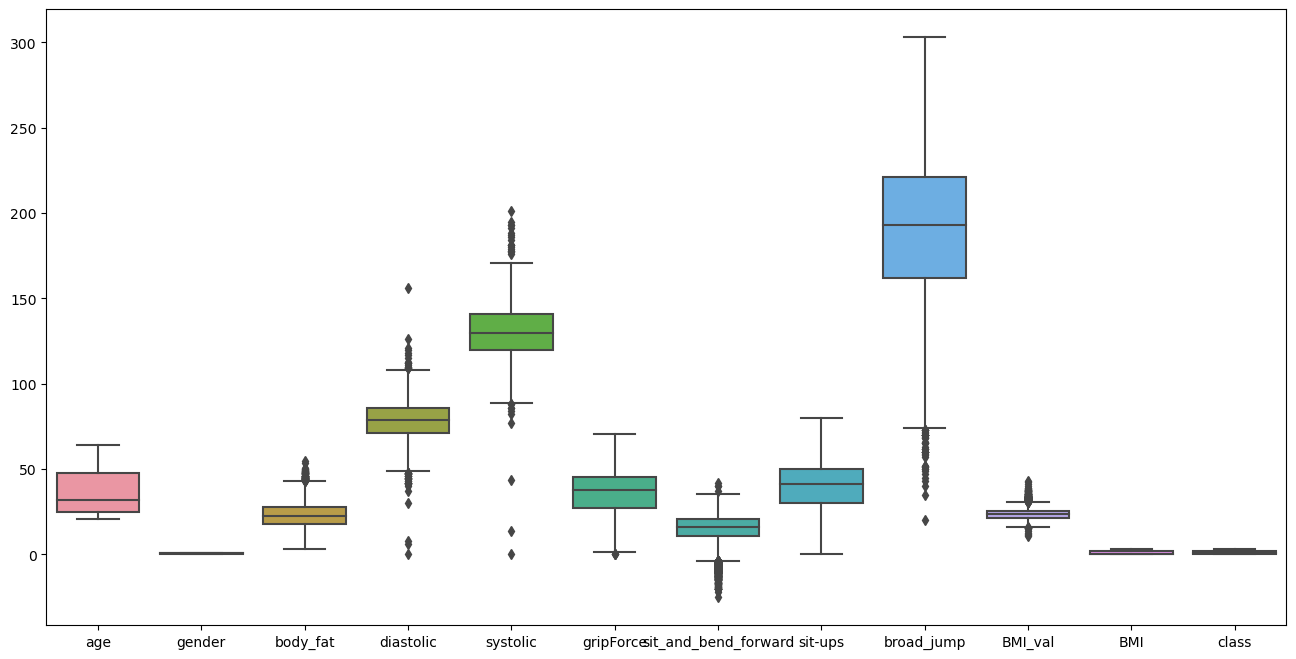

In [25]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)

# diastolic and systolic

diastolic value is too small and 0/0 is impossible bp

<AxesSubplot:xlabel='diastolic'>

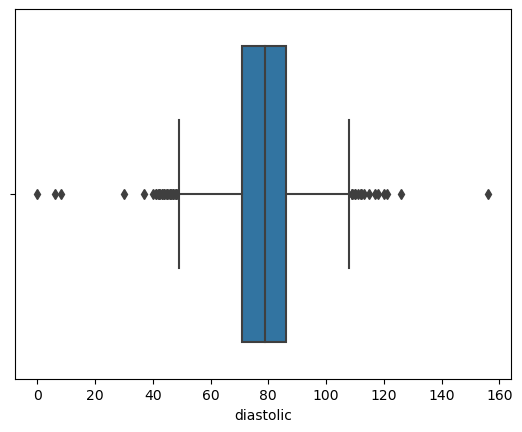

In [26]:
sns.boxplot(data=df,x="diastolic")

<AxesSubplot:xlabel='systolic'>

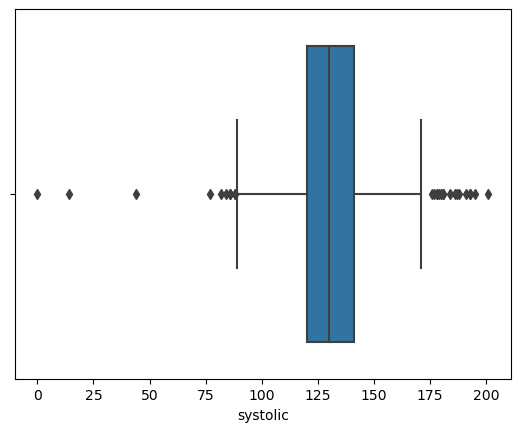

In [27]:
sns.boxplot(data=df,x="systolic")

In [28]:
filtered_data4 = df[df['diastolic'] <10]
filtered_data4

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class
336,35,1,22.8,8.0,122.0,46.4,16.7,47.0,216.0,B,25.90,2,1
3524,44,1,22.1,6.0,145.0,47.4,10.5,42.0,215.0,B,24.99,0,1
10624,26,0,32.0,0.0,0.0,23.7,17.1,23.0,128.0,D,24.83,0,3


negative pulse pressure (sys-dia<0) are impossible

In [29]:
filtered_data7 = df[df['diastolic'] >df['systolic']]
filtered_data7

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class
7495,30,0,28.2,156.2,104.0,21.7,27.2,43.0,162.0,C,21.64,0,2
7597,30,1,14.4,67.0,14.0,53.8,17.2,57.0,221.0,A,23.81,0,0
8217,31,1,20.8,46.2,43.9,43.9,17.2,57.0,221.0,B,25.72,2,1
12949,24,1,20.0,99.0,95.0,46.5,12.8,50.0,197.0,D,26.91,2,3


In [19]:
df = df[df['diastolic'] < df['systolic']]
df = df[df['diastolic'] >=10]

df.describe()

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,BMI,class
count,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000
mean,36.769668,0.632366,23.230469,78.811823,130.266901,36.969190,15.180910,39.781932,190.261524,23.604998,0.619877,1.499701
std,13.624253,0.482179,7.237905,10.659512,14.613190,10.619606,8.151913,14.258812,39.545191,2.940284,0.952418,1.118009
min,21.000000,0.000000,3.000000,30.000000,77.000000,0.000000,-25.000000,0.000000,20.000000,11.100000,0.000000,0.000000
25%,25.000000,0.000000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,21.610000,0.000000,0.000000
50%,32.000000,1.000000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,23.460000,0.000000,1.000000
75%,48.000000,1.000000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,25.340000,2.000000,2.000000
max,64.000000,1.000000,54.900000,126.000000,201.000000,70.500000,42.000000,80.000000,303.000000,42.910000,3.000000,3.000000


<AxesSubplot:>

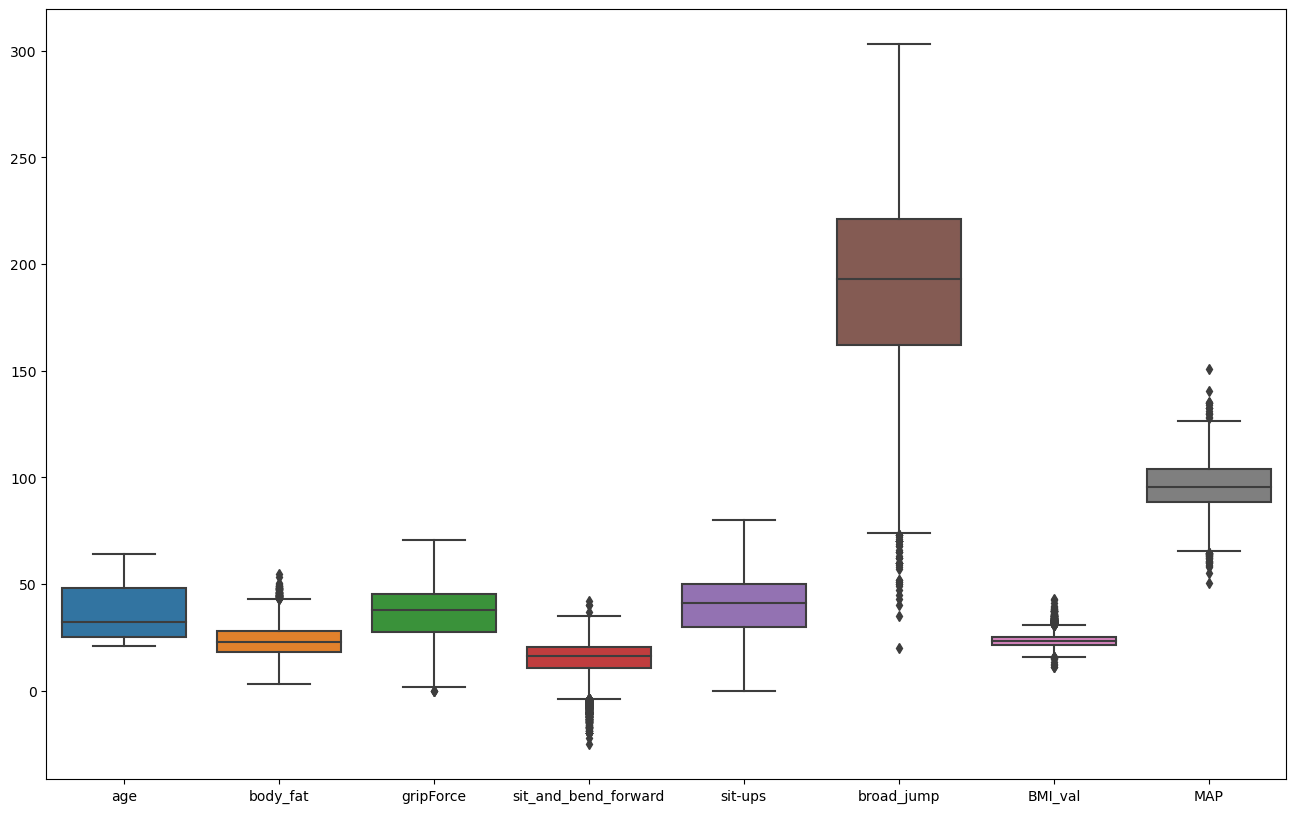

In [35]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df)

In [32]:
filtered_data8 = df[df['systolic']>190]
filtered_data8

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class
296,63,1,28.7,84.0,193.0,37.1,14.3,31.0,174.0,A,26.47,2,0
1220,63,1,24.6,101.0,195.0,35.5,15.8,23.0,161.0,C,20.21,0,2
8369,58,1,18.2,107.0,191.0,30.1,17.8,33.0,163.0,B,20.92,0,1
8532,60,1,25.4,126.0,201.0,48.7,14.5,38.0,194.0,A,27.02,2,0
13244,57,1,22.6,102.0,193.0,47.8,20.4,40.0,221.0,B,26.64,2,1


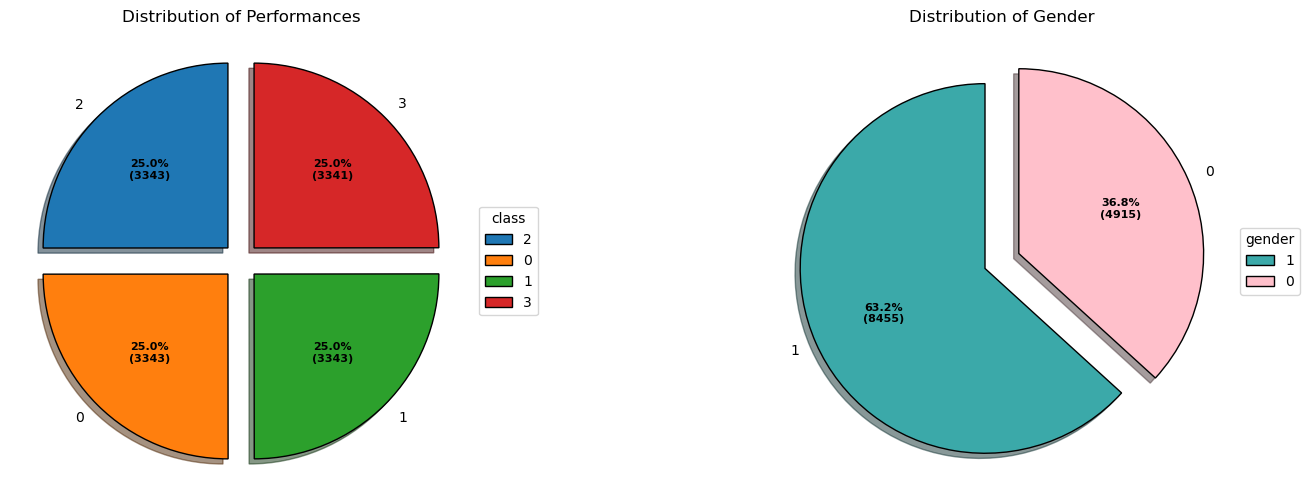

In [33]:
# Creating autocpt arguments
def pie(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

fig, axs = plt.subplots(1,2,figsize =(18, 6))

# class
wedges1, texts1, autotexts1 = axs[0].pie(df['class'].value_counts(),
                                      autopct = lambda pct: pie(pct, df['class'].value_counts()),
                                      explode = (.1, .1, .1, 0.1),
                                      labels = df['class'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)

# Adding legend
axs[0].legend(wedges1, df['class'].value_counts().index, title='class',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[0].set_title("Distribution of Performances")

# gender
wedges1, texts1, autotexts1 = axs[1].pie(df['gender'].value_counts(),
                                      autopct = lambda pct: pie(pct, df['gender'].value_counts()),
                                      explode = (0.1, .1), colors = ("#3BA9A9", "pink"),
                                      labels = df['gender'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)
 
# Adding legend
axs[1].legend(wedges1, df['gender'].value_counts().index, title='gender',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[1].set_title("Distribution of Gender")

plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13372 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   13372 non-null  int32  
 1   gender                13372 non-null  int64  
 2   body_fat              13372 non-null  float64
 3   diastolic             13372 non-null  float64
 4   systolic              13372 non-null  float64
 5   gripForce             13372 non-null  float64
 6   sit_and_bend_forward  13372 non-null  float64
 7   sit-ups               13372 non-null  float64
 8   broad_jump            13372 non-null  float64
 9   performance           13372 non-null  object 
 10  BMI_val               13372 non-null  float64
 11  BMI                   13372 non-null  int64  
 12  class                 13372 non-null  int64  
dtypes: float64(8), int32(1), int64(3), object(1)
memory usage: 1.4+ MB


In [35]:
df.head()

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class
0,27,1,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.34,2,2
1,25,1,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.50,0,0
2,31,1,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.18,0,2
3,32,1,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.35,0,1
4,28,1,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.41,0,1


In [36]:
df.describe()

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,BMI,class
count,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000
mean,36.769668,0.632366,23.230469,78.811823,130.266901,36.969190,15.180910,39.781932,190.261524,23.604998,0.619877,1.499701
std,13.624253,0.482179,7.237905,10.659512,14.613190,10.619606,8.151913,14.258812,39.545191,2.940284,0.952418,1.118009
min,21.000000,0.000000,3.000000,30.000000,77.000000,0.000000,-25.000000,0.000000,20.000000,11.100000,0.000000,0.000000
25%,25.000000,0.000000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,21.610000,0.000000,0.000000
50%,32.000000,1.000000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,23.460000,0.000000,1.000000
75%,48.000000,1.000000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,25.340000,2.000000,2.000000
max,64.000000,1.000000,54.900000,126.000000,201.000000,70.500000,42.000000,80.000000,303.000000,42.910000,3.000000,3.000000


<AxesSubplot:>

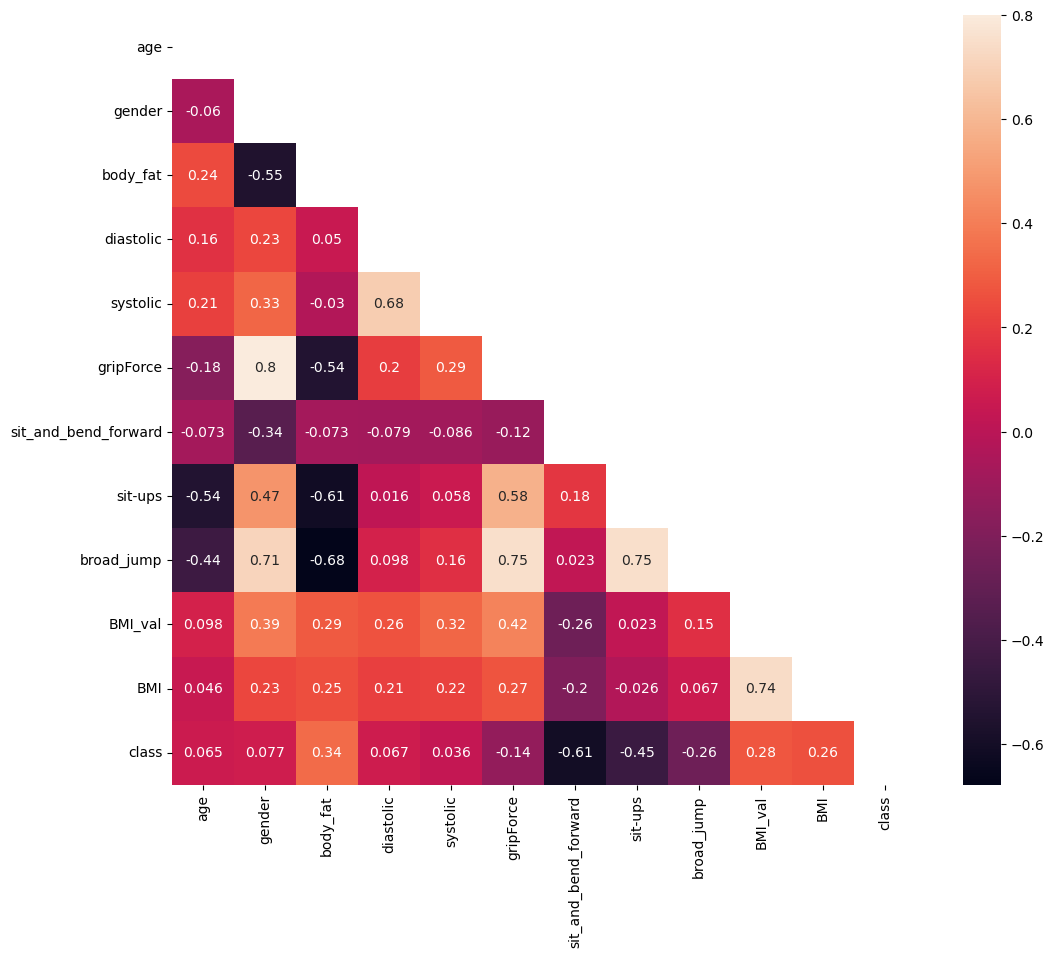

In [37]:
mask = np.zeros_like(df.corr())
tri_ind = np.triu_indices_from(df.corr())
mask[tri_ind] = True
plt.figure(figsize=[12, 10])
sns.heatmap(data=df.corr(), mask=mask, annot=True)



In [38]:


df.head()

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class
0,27,1,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.34,2,2
1,25,1,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.50,0,0
2,31,1,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.18,0,2
3,32,1,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.35,0,1
4,28,1,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.41,0,1


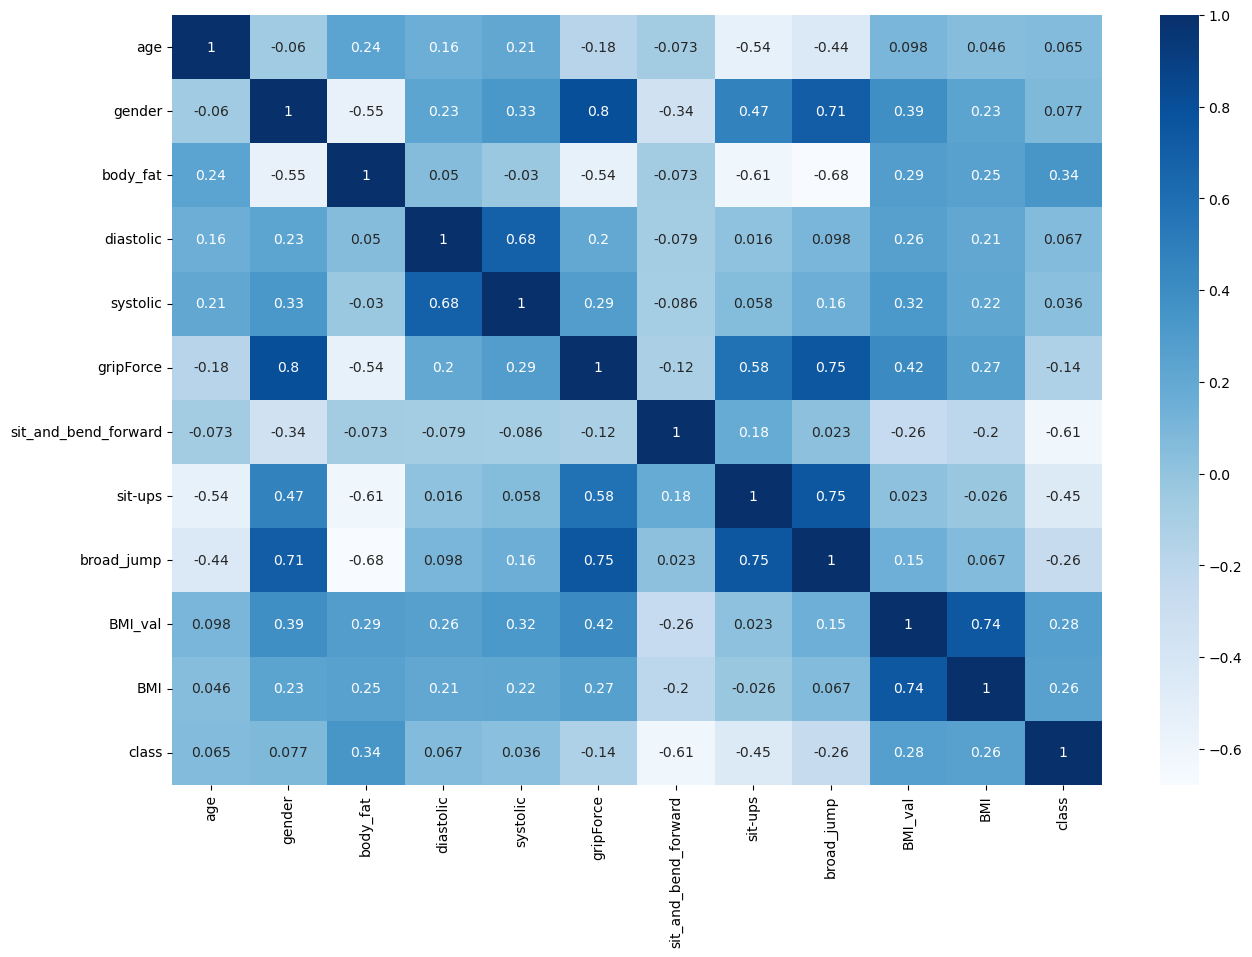

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()


In [29]:
# set random seed for reproducibility
np.random.seed(42)

df = pd.read_csv('bodyPerformance.csv')

df.duplicated().sum()
print(f'with duplicates:{df.shape}')
df.drop_duplicates(inplace=True)
print(f'without duplicates:{df.shape}')

df.rename(columns={"height_cm": "height", "weight_kg": "weight","body fat_%":"body_fat",
                   "sit and bend forward_cm":"sit_and_bend_forward","sit-ups counts":"sit-ups",
                   "broad jump_cm":"broad_jump","class":"performance"},inplace=True)

df.age = df.age.astype(int)

gender = {'F':0,'M':1}
df['gender'] =df['gender'].replace(gender)

df["BMI_val"]=round((df['weight']/(df['height'])/(df['height']))*10000,2)

def BMI (row):
    bmi = ((row.weight/row.height)/row.height)*10000
    if bmi>=18.5 and bmi < 25: 
        return 0 
    elif bmi < 18.5:
        return 1
    elif bmi >= 25 and bmi < 30:
        return 2
    else:
        return 3
    
df['BMI'] = df.apply(BMI,axis=1)

Class = {'A':0, 'B':1, 'C':2, 'D':3}
df['class'] =df['performance'].replace(Class)

df = df[(df["body_fat"] <= 70)]
df = df[(df["sit_and_bend_forward"] <= 50)]
df = df[(df["broad_jump"] >0)]


df.drop(['height','weight'],axis=1, inplace=True)

df = df[df['diastolic'] < df['systolic']]
df = df[df['diastolic'] >=10]

df.describe()

with duplicates:(13393, 12)
without duplicates:(13392, 12)


,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,BMI,class
count,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000
mean,36.769668,0.632366,23.230469,78.811823,130.266901,36.969190,15.180910,39.781932,190.261524,23.604998,0.619877,1.499701
std,13.624253,0.482179,7.237905,10.659512,14.613190,10.619606,8.151913,14.258812,39.545191,2.940284,0.952418,1.118009
min,21.000000,0.000000,3.000000,30.000000,77.000000,0.000000,-25.000000,0.000000,20.000000,11.100000,0.000000,0.000000
25%,25.000000,0.000000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,21.610000,0.000000,0.000000
50%,32.000000,1.000000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,23.460000,0.000000,1.000000
75%,48.000000,1.000000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,25.340000,2.000000,2.000000
max,64.000000,1.000000,54.900000,126.000000,201.000000,70.500000,42.000000,80.000000,303.000000,42.910000,3.000000,3.000000


# sys & dia

In [30]:
df["MAP"]=round((((2*df['diastolic'])+(df['systolic']))/3),2)
df.drop(['diastolic','systolic'],axis=1, inplace=True)
df.describe()


,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,BMI,class,MAP
count,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000,13372.000000
mean,36.769668,0.632366,23.230469,36.969190,15.180910,39.781932,190.261524,23.604998,0.619877,1.499701,95.963473
std,13.624253,0.482179,7.237905,10.619606,8.151913,14.258812,39.545191,2.940284,0.952418,1.118009,11.018172
min,21.000000,0.000000,3.000000,0.000000,-25.000000,0.000000,20.000000,11.100000,0.000000,0.000000,50.330000
25%,25.000000,0.000000,18.000000,27.500000,10.900000,30.000000,162.000000,21.610000,0.000000,0.000000,88.330000
50%,32.000000,1.000000,22.800000,37.900000,16.200000,41.000000,193.000000,23.460000,0.000000,1.000000,95.670000
75%,48.000000,1.000000,28.000000,45.200000,20.700000,50.000000,221.000000,25.340000,2.000000,2.000000,104.000000
max,64.000000,1.000000,54.900000,70.500000,42.000000,80.000000,303.000000,42.910000,3.000000,3.000000,151.000000


In [31]:
df.drop(['gender','BMI','class','performance'],axis=1, inplace=True)
df.head()

,age,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,MAP
0,27,21.3,54.9,18.4,60.0,217.0,25.34,96.67
1,25,15.7,36.4,16.3,53.0,229.0,20.50,93.33
2,31,20.1,44.8,12.0,49.0,181.0,24.18,112.00
3,32,18.4,41.4,15.2,53.0,219.0,23.35,99.67
4,28,17.1,43.5,27.1,45.0,217.0,22.41,89.00


<AxesSubplot:>

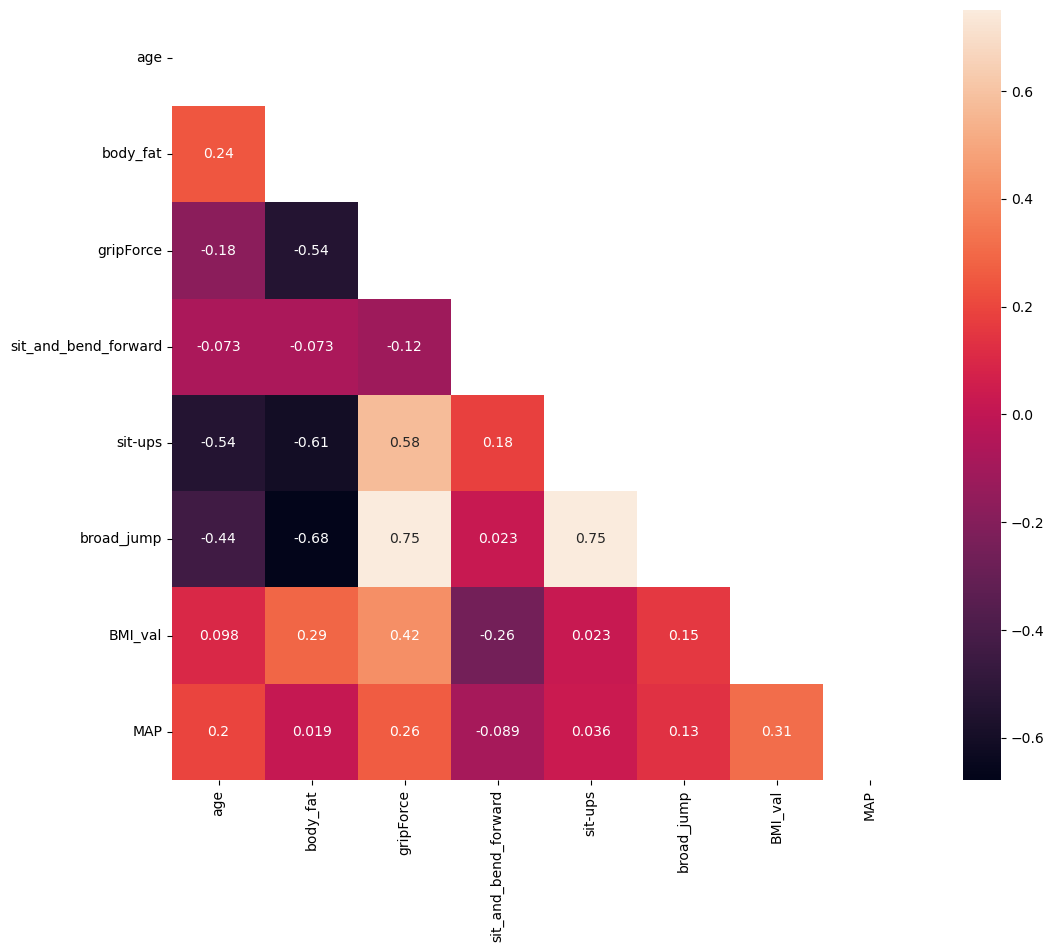

In [32]:
mask = np.zeros_like(df.corr())
tri_ind = np.triu_indices_from(df.corr())
mask[tri_ind] = True
plt.figure(figsize=[12, 10])
sns.heatmap(data=df.corr(), mask=mask, annot=True)

